In [1]:
from statsbombpy import sb

In [3]:
events = sb.events(match_id=3773585)

c:\Users\alexa\Documents\Projets perso\Football-Analytics\football-analytics\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [4]:
events_messi = events[events["player"] == "Ferland Mendy"]

In [5]:
location = events_messi['location'].tolist()

In [6]:
location_clean = [item for item in location if str(item) != 'nan']

In [7]:
location_clean

[[42.9, 3.8],
 [29.9, 0.1],
 [16.1, 13.8],
 [29.0, 15.4],
 [50.6, 8.0],
 [14.1, 23.8],
 [27.8, 22.5],
 [72.0, 4.5],
 [56.4, 9.5],
 [81.8, 12.0],
 [95.7, 5.0],
 [79.4, 17.1],
 [40.3, 4.1],
 [92.4, 4.5],
 [22.9, 13.3],
 [54.8, 12.4],
 [42.9, 29.6],
 [76.2, 13.1],
 [99.9, 9.8],
 [85.3, 9.1],
 [81.2, 14.6],
 [35.2, 9.1],
 [57.7, 10.7],
 [60.7, 9.8],
 [78.0, 8.4],
 [71.5, 10.5],
 [117.1, 22.5],
 [84.4, 12.3],
 [72.0, 36.0],
 [27.8, 18.7],
 [91.1, 7.3],
 [78.9, 11.9],
 [85.3, 17.2],
 [94.2, 11.6],
 [14.7, 9.5],
 [98.6, 16.6],
 [11.2, 0.1],
 [32.0, 0.1],
 [79.8, 13.0],
 [62.0, 7.0],
 [19.3, 15.0],
 [69.2, 15.5],
 [3.2, 2.2],
 [10.6, 0.1],
 [37.5, 4.7],
 [36.1, 5.9],
 [70.9, 11.1],
 [21.4, 10.2],
 [18.2, 7.0],
 [5.9, 8.4],
 [40.5, 9.3],
 [45.4, 6.1],
 [46.5, 6.1],
 [76.7, 16.7],
 [64.2, 16.0],
 [46.2, 4.1],
 [16.1, 11.1],
 [108.7, 26.6],
 [27.8, 15.4],
 [49.9, 7.8],
 [15.0, 23.2],
 [69.0, 6.6],
 [58.7, 7.5],
 [80.6, 12.5],
 [105.7, 5.4],
 [79.0, 14.7],
 [86.9, 7.5],
 [17.5, 9.9],
 [42.4, 15.7]

In [10]:
import pandas as pd 

x = pd.Series([el[0] for el in location_clean])
y = pd.Series([el[1] for el in location_clean])

In [11]:
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from scipy.ndimage import gaussian_filter
from mplsoccer import Pitch, VerticalPitch

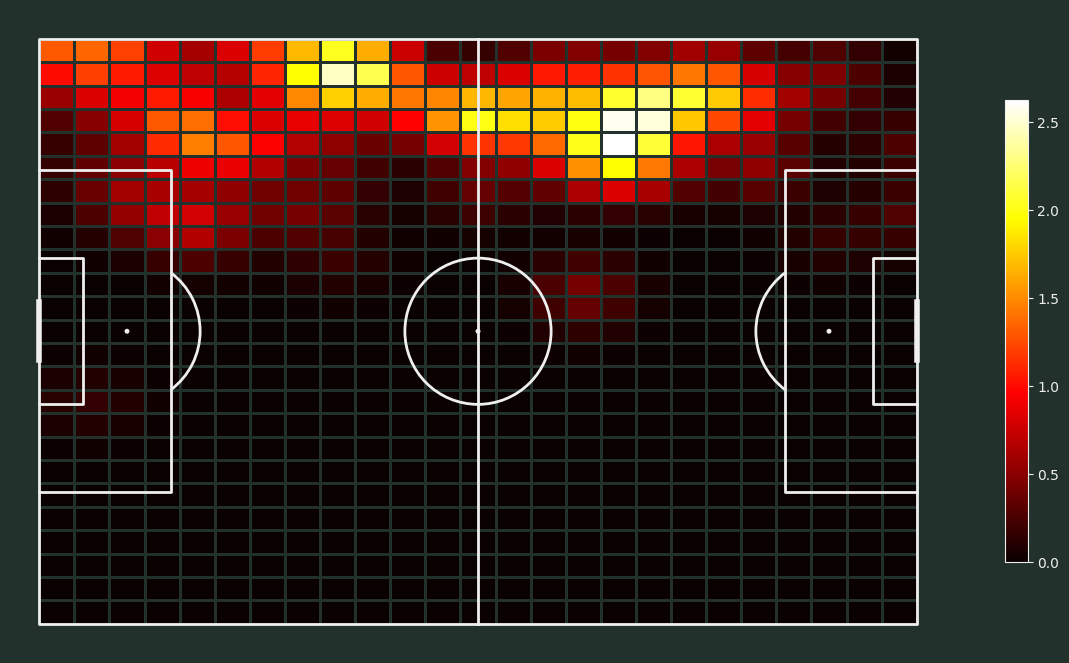

In [18]:
# setup pitch
pitch = Pitch(pitch_type='statsbomb', line_zorder=2,
              pitch_color='#22312b', line_color='#efefef')
# draw
fig, ax = pitch.draw(figsize=(12, 8))
fig.set_facecolor('#22312b')
bin_statistic = pitch.bin_statistic(x, y, statistic='count', bins=(25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax, cmap='hot', edgecolors='#22312b') #YlOrRd
# Add the colorbar and format off-white
cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')
plt.show()